In [1]:
from typing import Optional

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import seaborn as sns
from sklearn.datasets import make_regression

%matplotlib inline
from matplotlib import rc
from IPython.display import HTML, Image
rc('animation', html='html5')

In [28]:
x = np.linspace(0, 10, 300)

def func(x):
    return x*np.cos((x-9))

In [79]:
def get_derivative(func, x0=0, degree=1):
    '''Get the derivative at x0 of n-th degree'''
    x = np.linspace(x0-6, x0+6, 3000)
    dx = x[1]-x[0]
    y = func(x)
    for i in range(degree):
        y = np.gradient(y, dx)
    closest_to_0_x = min(x, key=lambda x: abs(x - x0))
    zero_index_in_x = np.where(x==closest_to_0_x)[0][0]
    return y[zero_index_in_x]

def get_slope(x, x0):
    '''Get a linear slope function at point x0'''
    b = get_derivative(func, x0=x0)
    a = func(x0) - get_derivative(func, x0=x0)*x0
    x = np.array(x)
    return a + x*b

def gradient_descent(func, start, step_size, stop=0.01):
    '''Get a list of values representing steps in 1-d gradient descent'''
    container = [start]
    while True:  
        step = get_derivative(func, start)*step_size
        if step < stop: # early stopping
            break
        start = start - step
        container.append(start)
    return np.array(container)

In [114]:
gradient_descent(func, 8, 0.1, 0.001)

array([8.        , 7.27226881, 6.57023373, 6.21802902, 6.09411202,
       6.05031056, 6.03434251, 6.02843816, 6.02624277])

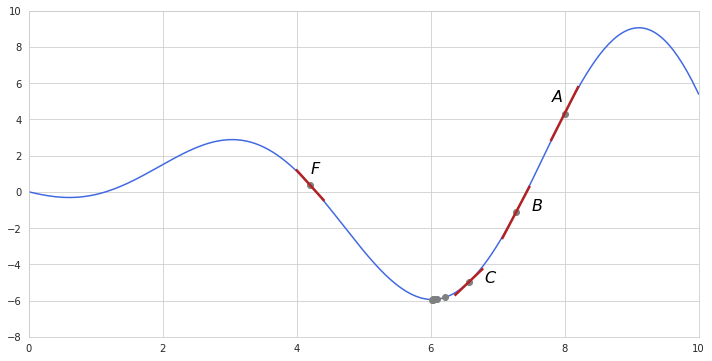

In [117]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(12,6))

# function
ax.plot(x, func(x), color='royalblue')

gr_desc_points = gradient_descent(func, 8, 0.1, 0.001)
ax.scatter(gr_desc_points, func(gr_desc_points), color='grey', zorder=5)

# plot example of a slope at points
ax.plot([7.8, 8.2], get_slope([7.8, 8.2], 8), color='firebrick', linewidth=2.5, zorder=6)
ax.text(7.8, 5, '$A$', size=16)
ax.plot([7.072, 7.472], get_slope([7.072, 7.472], 7.272), color='firebrick', linewidth=2.5, zorder=6)
ax.text(7.5, -1, '$B$', size=16)
ax.plot([6.37, 6.77], get_slope([6.37, 6.77], 6.57), color='firebrick', linewidth=2.5, zorder=6)
ax.text(6.8, -5, '$C$', size=16)

ax.scatter([4.2], func(4.2), color='grey', zorder=5)
ax.plot([4, 4.4], get_slope([4, 4.4], 4.2), color='firebrick', linewidth=2.5, zorder=6)
ax.text(4.2, 1, '$F$', size=16)

ax.set_xlim(0, 10)
ax.set_ylim(-8, 10)
plt.savefig('../../assets/images/optimization/gradient_descent_example.png', bbox_inches='tight');

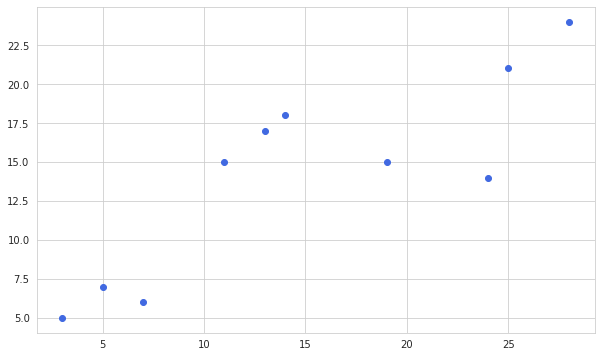

In [2]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(10,6))
x = np.array([3, 5, 7, 11, 13, 14, 19, 24, 25, 28])
y = np.array([5, 7, 6, 15, 17, 18, 15, 14, 21, 24])
ax.scatter(x, y, color='royalblue')
plt.savefig('../../assets/images/regression/some_linear_distribution.png', bbox_inches='tight');

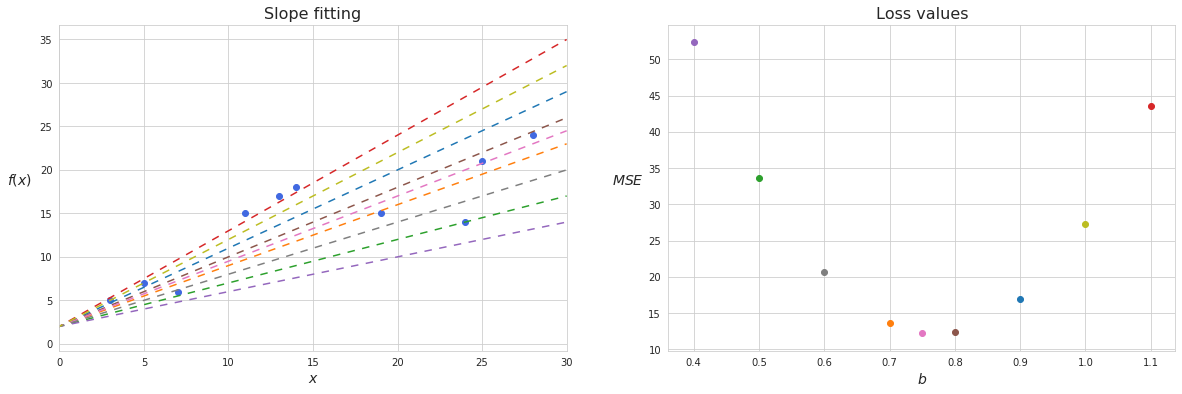

In [3]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(1, 2, figsize=(20,6))
x = np.array([3, 5, 7, 11, 13, 14, 19, 24, 25, 28])
y = np.array([5, 7, 6, 15, 17, 18, 15, 14, 21, 24])
ax[0].scatter(x, y, color='royalblue')

a = 2
x_s = np.linspace(-1, 30, 600)

# guess 1
bs = [0.9, 0.7, 0.5, 1.1, 0.4, 0.8, 0.75, 0.6, 1]
for b in bs:
    y1 = a + x_s * b
    ax[0].plot(x_s, y1, linestyle='--', dashes=(5,5))

    y1_s = a + x * b
    p_1 = np.sum((y1_s - y)**2) / len(y)
    ax[1].scatter(b, p_1)

ax[0].set_xlim(0, 30)
ax[0].set_xlabel('$x$', fontsize=14)
ax[0].set_ylabel('$f(x)$', fontsize=14, rotation=0, labelpad=20)

ax[1].set_xlabel('$b$', fontsize=14)
ax[1].set_ylabel('$MSE$', fontsize=14, rotation=0, labelpad=20)

ax[0].set_title('Slope fitting', fontsize=16)
ax[1].set_title('Loss values', fontsize=16)
plt.savefig('../../assets/images/regression/loss_values_and_slope.png', bbox_inches='tight');

# Gadient descent

In [5]:
# Simulate data for univariate linear regression
X, y = make_regression(n_samples=100, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=42)
X = X.flatten()
# Add ones to account for intercept in the model
X = np.vstack([np.ones(X.size), X]).T

# Initail value of theta
theta = np.array([-45, -100])

In [ ]:
# Show animated object from Jupyter
#anim

In [103]:
# Show animated object from file
#Image('../assets/images/gradient_descent/3d_gradient_descent_demo.gif')

In [3]:
class GradientDescent:
    '''Gradient descent implementation.
    
    Parameters
    ----------
    X: np.ndarray
        Array of independent variables.
    y: np.ndarray
        Array of dependent variable.
    theta: np.ndarray
        Initial guess of regression parameters.
        
    Attributes
    ----------
    eta: float
        Learning rate of gradient descent.
    maxsteps: int
        Maximum number oвлазитf iterations.
    min_gain: float
        Minimal number of improvement towards the minimum of the loss function.
    type: Optional[str]
        Type of gradient descent, one of the following:
        'stochastic', 'batch' or None. If None then mini-batch descend is used.
    beta: float
        Momentum coeffieicent.
    '''
    def __init__(self,
                 X: np.ndarray,
                 y: np.ndarray,
                 theta: np.ndarray):
        self.theta = theta
        self.X = X
        self.y = y
         
    eta = 0.01
    maxsteps = 1000
    min_gain = 1e-06
    type = 'mini-batch'
    extension = None
    beta = 0.9
    
    
    def get_data(self):
        '''Obtain only random subsets depending on type.'''
        if self.type == 'stochastic':
            random_index = np.random.randint(self.y.size)
            X_obs, y_obs = self.X[random_index], self.y[random_index]
            return (X_obs.reshape(1, -1), np.array([y_obs]))
        elif self.type == 'mini-batch':
            random_indices = np.random.choice(self.y.size, 32)
            X_obs, y_obs = self.X[random_indices], self.y[random_indices]
            return (X_obs, y_obs)
        else:
            return (self.X, self.y)

    
    def get_gradient(self, X, y, theta):
        '''Vectorized version of the loss function and its gradient.'''
        err = X @ theta - y
        J = (err.T @ err) / y.size
        gradient_J = 1/(2*y.size) * (X.T @ err)
        return (J, gradient_J)
    
    
    def descend(self, extension: Optional[str] = None):
        '''Gradient descent. Available options for extension: momentum.'''
        theta = self.theta
        theta_hist = [theta]
        if extension is None:
            beta = 0
        else:
            beta = self.beta
        # Initial guess
        step = 0
        gain = 999
        X_obs, y_obs = self.get_data()
        J, gradient_J = self.get_gradient(X_obs, y_obs, theta)
        loss_hist = [J]
        v = self.eta*(1 - beta)*gradient_J
        while step <= self.maxsteps and (gain > self.min_gain or gain < 0):
            step += 1
            theta = theta - v
            theta_hist.append(theta)
            X_obs, y_obs = self.get_data()
            J, gradient_J = self.get_gradient(X_obs, y_obs, theta)
            v = beta*v + self.eta*(1 - beta)*gradient_J
            gain = loss_hist[-1] - J
            loss_hist.append(J)
        return (np.array(loss_hist), np.array(theta_hist))

### Plotting

#### Animated 2d SGD with momentum

In [186]:
gd = GradientDescent(X, y, theta)
gd.type = 'stochastic'
gd.eta = 0.02
gd.beta = 0.9
gd.min_gain = 0.1
gd.maxsteps = 250


t0_s = np.linspace(-50, 50, 100)
t1_s = np.linspace(-120, 150, 100)

# Pairwise combinations of theta values
T0, T1 = np.meshgrid(t0_s, t1_s)
# Cost function for each combination of theta values
zs = np.array([gd.get_gradient(X, y, theta)[0]
               for theta in zip(np.ravel(T0), np.ravel(T1))])
# Putting the array of cost function results into dimension of thetas
Z = zs.reshape(T0.shape)
    
def visualize(animate=False):
    fig, ax = plt.subplots(figsize=(12, 6))
    contour_plot = ax.contour(T0, T1, Z, 15, cmap='coolwarm')
    cbar = fig.colorbar(contour_plot)
    cbar.set_label('Loss', fontsize=14)
    ax.set_xlabel(r'$\theta_0$', fontsize=14)
    ax.set_ylabel(r'$\theta_1$', fontsize=14, labelpad=-10)

    # Simple stochastic gradient descent
    J, gradient_J = gd.descend()
    theta0s = gradient_J.T[0]
    theta1s = gradient_J.T[1]
    
    # Stochastic gradient descent with momentum
    J_m, gradient_J_m = gd.descend(extension='momentum')
    theta0s_m = gradient_J_m.T[0]
    theta1s_m = gradient_J_m.T[1]
    
    if animate:
        line, = ax.plot([], [], color='firebrick', marker='.', markersize=1)
        
        array_for_SGD = np.array([theta0s, theta1s])
        array_for_m = np.array([theta0s_m, theta1s_m])
        if J.size > J_m.size:
            extending_value = array_for_m[:, -1]
            fill_array = np.repeat(extending_value, J.size-J_m.size, axis=0).reshape(2, -1)
            array_for_m = np.concatenate((array_for_m, fill_array), axis=1)
        elif J.size < J_m.size:
            extending_value = array_for_SGD[:, -1]
            fill_array = np.repeat(extending_value, J_m.size-J.size, axis=0).reshape(2, -1)
            array_for_SGD = np.concatenate((array_for_SGD, fill_array), axis=1)
        
        data = [array_for_SGD, array_for_m]
        
        lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], 
                 marker='.', markersize=3)[0] for dat in data]
        ax.legend(labels=['SGD with momentum', 'SGD'])
        plt.tight_layout()
        
        def animate(i, data, lines):
            for line, data in zip(lines, data):
                line.set_data(data[0:2,:i*3])
            return lines
        
        anim = FuncAnimation(fig, animate, fargs=(data, lines),
                             frames=int(J.size//3), interval=100, blit=True)
        return anim
        
    else:
        # SGD
        ax.plot(theta0s, theta1s, color='firebrick', marker='.', markersize=1)
        # SGD with momentum
        ax.plot(theta0s_m, theta1s_m, color='navy', marker='.', markersize=1)
        return fig

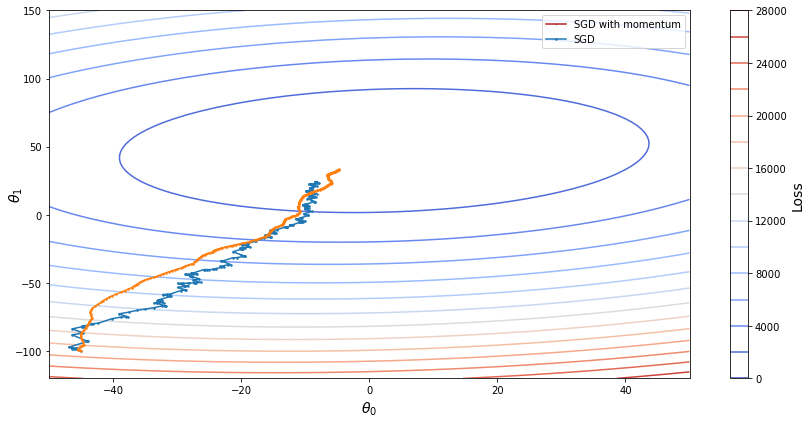

In [187]:
viz_anim_with_momentum = visualize(animate=True)
viz_anim_with_momentum.save('../../assets/images/gradient_descent/gradient_descent_with_momentum_demo.gif', writer='imagemagick');

In [188]:
viz_anim_with_momentum

#### Animated SGD

In [273]:
gd = GradientDescent(X, y, theta)
gd.type = 'stochastic'
gd.eta = 0.02
gd.min_gain = 0.1
gd.maxsteps = 350

zs = np.array([gd.get_gradient(X, y, theta)[0]
               for theta in zip(np.ravel(T0), np.ravel(T1))])
# Putting the array of cost function results into dimension of thetas
Z = zs.reshape(T0.shape)
    
def visualize_SGD(animate=False):
    fig, ax = plt.subplots(figsize=(12, 6))
    contour_plot = ax.contour(T0, T1, Z, 15, cmap='coolwarm')
    cbar = fig.colorbar(contour_plot)
    cbar.set_label('Loss', fontsize=14)
    ax.set_xlabel(r'$\theta_0$', fontsize=14)
    ax.set_ylabel(r'$\theta_1$', fontsize=14, labelpad=-10)
    plt.tight_layout()
    
    # Simple stochastic gradient descent
    J, gradient_J = gd.descend()
    theta0s = gradient_J.T[0]
    theta1s = gradient_J.T[1]
    
    line, = ax.plot([], [], color='firebrick', marker='.', markersize=1)
    
    if animate:
        def animate(i):
            line.set_data(theta0s[:i*3], theta1s[:i*3])
            return line,
        
        anim = FuncAnimation(fig, animate, frames=int(J.size//3), interval=100, blit=True)
        return anim
        
    else:
        # SGD
        ax.plot(theta0s, theta1s, color='firebrick', marker='.', markersize=1)
        return fig

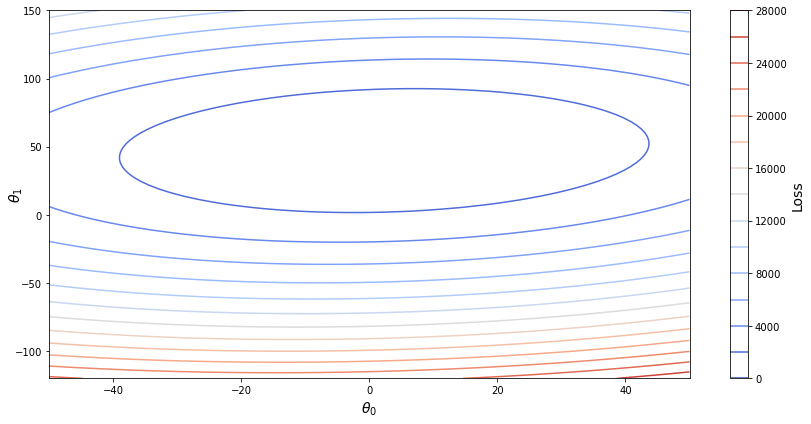

In [274]:
SGD_animation = visualize_SGD(animate=True)
SGD_animation.save('../../assets/images/gradient_descent/SGD_demo.gif', writer='imagemagick');

In [275]:
SGD_animation

#### Animated 3D

In [46]:
# 3D plot
gd.type = 'batch'
gd.eta = 0.03
gd.min_gain = 0.1
gd.maxsteps = 290

    
def visualize_3d(animate=False):
    # Meshgrid of all possible theta values
    T0, T1 = np.meshgrid(np.linspace(-100, 100, 100), 
                         np.linspace(-150, 150, 100))
    
    # Cost function for each combination of theta values
    zs = np.array([gd.get_gradient(X, y, theta)[0]
                   for theta in zip(np.ravel(T0), np.ravel(T1))])
    # Put the array of cost function results into dimension of thetas
    Z = zs.reshape(T0.shape)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(T0, T1, Z, cmap='coolwarm', alpha=0.6)
    ax.set_xlabel(r'$\theta_0$', fontsize=16)
    ax.set_ylabel(r'$\theta_1$', fontsize=16)
    ax.set_zlabel('$J$', fontsize=16)
    ax.view_init(elev=30, azim=45)
    ax.contour(T0, T1, Z, 20, cmap='coolwarm', alpha=0.9, offset=0)
    plt.tight_layout()

    # Simple stochastic gradient descent
    J, gradient_J = gd.descend()
    theta0s = gradient_J.T[0]
    theta1s = gradient_J.T[1]
    
    if animate:        
        data = [np.array([theta0s, theta1s, J]),
                np.array([theta0s, theta1s, np.full(J.size, 0)])]
        
        lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1], 
                 marker='.', markersize=3, color='maroon')[0] for dat in data]
                         
        def animate(i, data, lines):
            for line, data in zip(lines, data):
                line.set_data(data[0:2,:i*3])
                line.set_3d_properties(data[2,:i*3])
            return lines
        
        anim = FuncAnimation(fig, animate, fargs=(data, lines),
                             frames=int(J.size//3), interval=100, blit=True)
        return anim
        
    else:
        ax.plot(theta0s, theta1s, J, color='maroon', marker='.', markersize=3)
        ax.plot(theta0s, theta1s, 0, color='indianred', marker='.', markersize=3)
        return fig

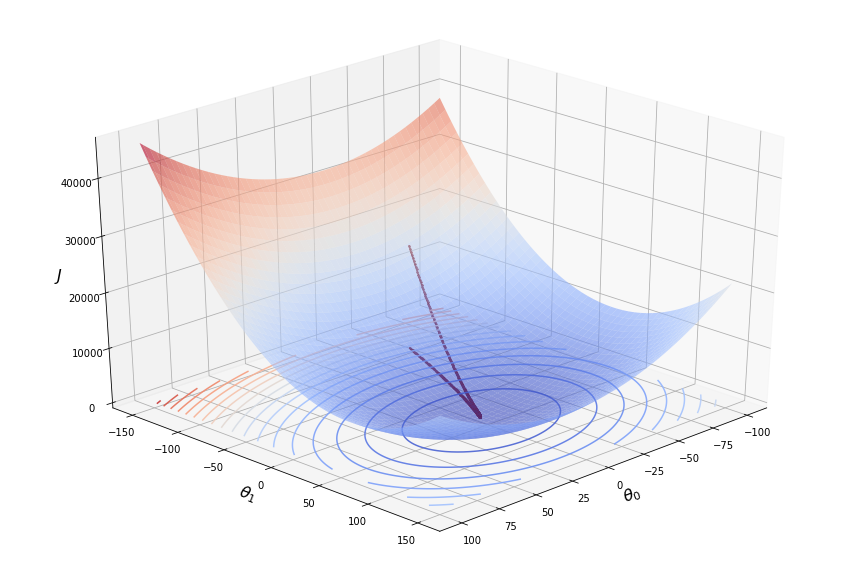

In [47]:
viz_3d_anim = visualize_3d(animate=True)
viz_3d_anim.save('../../assets/images/gradient_descent/3d_gradient_descent_demo.gif', writer='imagemagick');

In [44]:
viz_3d_anim

### Nesterov accelerated descent (NAG)

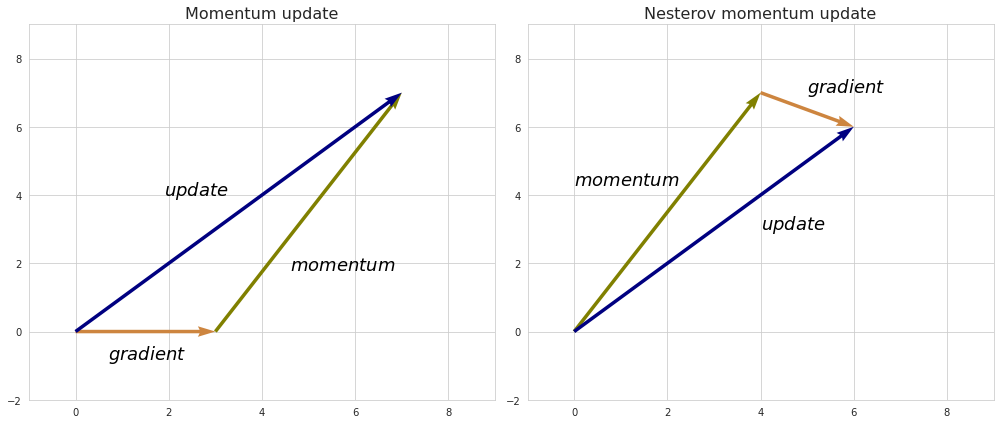

In [3]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].quiver([0, 3, 0], # x origin
             [0, 0, 0], # y origin
             [3, 4, 7], # x end
             [0, 7, 7], # y end
             color=['peru', 'olive', 'navy'], lw=0.7,
             angles='xy', scale_units='xy', scale=1)
ax[0].set_xlim(-1, 9)
ax[0].set_ylim(-2, 9)
ax[0].annotate(s='$momentum$', xy=(0, 0), xytext=(4.6, 1.8), fontsize=18)
ax[0].annotate(s='$gradient$', xy=(0, 0), xytext=(0.7, -0.8), fontsize=18)
ax[0].annotate(s='$update$', xy=(0, 0), xytext=(1.9, 4), fontsize=18)
ax[0].set_title('Momentum update', size=16)

ax[1].quiver([4, 0, 0], # x origin
             [7, 0, 0], # y origin
             [2, 4, 6], # x vector
             [-1, 7, 6], # y vector
             color=['peru', 'olive', 'navy'], lw=0.7,
             angles='xy', scale_units='xy', scale=1)
ax[1].set_xlim(-1, 9)
ax[1].set_ylim(-2, 9)
ax[1].annotate(s='$momentum$', xy=(0, 0), xytext=(0, 4.3), fontsize=18)
ax[1].annotate(s='$gradient$', xy=(0, 0), xytext=(5, 7), fontsize=18)
ax[1].annotate(s='$update$', xy=(0, 0), xytext=(4, 3), fontsize=18)
ax[1].set_title('Nesterov momentum update', size=16)
plt.tight_layout()
plt.savefig('../../assets/images/gradient_descent/Nesterov_momentum_demo.png', bbox_inches='tight');